In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays
using Statistics
using JLD
using CairoMakie

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [43]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= 0.07; k2 = 0.07
k = 0.0
tspan = (0.0, 300000.0)

(0.0, 300000.0)

In [44]:
k1_space = range(-0.5, 0.0, step = 0.01)
k_space = range(0.0, 0.5, step = 0.01)

0.0:0.01:0.5

In [45]:
length(k_space), length(k1_space)

(51, 51)

In [46]:
u0_map = zeros(length(k1_space), length(k_space), 6);
spectrum_map = zeros(length(k1_space), length(k_space), 6);
EE_map = zeros(length(k1_space), length(k_space));

In [ ]:
for (i_index, k1) in enumerate(k1_space)
    for (j_index, k) in enumerate(k_space)
        
            if i_index == j_index && i_index == 1
                global u0 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
            end
            
            println("i index: $i_index;"); flush(stdout)
            println("j index: $j_index;"); flush(stdout)
            println("u0: $u0"); flush(stdout)
            u0_map[i_index, j_index, :] = u0
            p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
        
            prob = ODEProblem(HR, u0, tspan, p)
            sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)
            u0 = sol[end]
        
            ds_HR = ContinuousDynamicalSystem(HR, u0, p )
            spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))
            spectrum_map[i_index, j_index, :] = spectrum
            println("spectrum: $spectrum"); flush(stdout)
        
            if spectrum[1] > 0
                 xsum = sol[1,:] + sol[4,:]
                 println("x_sum before truncate length: ", length(xsum)); flush(stdout)
                 xsum = xsum[floor(Int, length(xsum) / 2):end ]
                 println("x_sum after truncate length: ", length(xsum)); flush(stdout)
    
                 Hs = Statistics.mean(xsum) + 6 * Statistics.std(xsum)
                 counts = xsum[xsum.>=Hs]
                 counts = length(counts)
                 EE_map[i_index, j_index]  = counts
    
                 println("counts: ", counts)
            end
        
            println("last point: $u0"); flush(stdout)
            println(" >>>>>> "); flush(stdout)
            println(""); flush(stdout)
    end
end

i index: 1;
j index: 1;
u0: [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
spectrum: [0.011694718648400809, 3.338098825293769e-5, -0.0036611150703078233, -0.013497680797649606, -6.497851138286808, -11.739801458156265]
x_sum before truncate length: 4296794
x_sum after truncate length: 2148398
counts: 75
last point: [-1.345336136025408, -8.073124226075285, 3.7861149500766196, -0.9201221034853521, -3.3199100239182258, 3.9877324357304933]
 >>>>>> 

i index: 1;
j index: 2;
u0: [-1.345336136025408, -8.073124226075285, 3.7861149500766196, -0.9201221034853521, -3.3199100239182258, 3.9877324357304933]
spectrum: [0.011863919758329176, 7.33281648567199e-5, -0.0022197602471950924, -0.012231910267391856, -6.465906110139735, -11.731990625910036]
x_sum before truncate length: 4281020
x_sum after truncate length: 2140511
counts: 47
last point: [-0.2300817436639527, 0.05367249957776275, 3.92833286069247, -1.078996284700609, -4.86622920897175, 3.9906633117811854]
 >>>>>> 

i index: 1;
j index: 3;
u0: [-0.230081743663

 >>>>>> 

i index: 1;
j index: 17;
u0: [-0.8321501646214341, -2.478095470449914, 4.13592182141264, -1.0715372624807882, -5.238446883579815, 3.42317323043069]
spectrum: [0.015374963578522078, 6.481104152728397e-5, -0.002280967430848313, -0.0163699344038733, -4.965684631654148, -13.197521759086998]
x_sum before truncate length: 4719808
x_sum after truncate length: 2359905
counts: 151
last point: [-0.7051219186624668, -1.9883540517301639, 3.651185832344998, -0.44765468972224914, -0.04336935428339812, 4.5965234898650476]
 >>>>>> 

i index: 1;
j index: 18;
u0: [-0.7051219186624668, -1.9883540517301639, 3.651185832344998, -0.44765468972224914, -0.04336935428339812, 4.5965234898650476]
spectrum: [-1.994816923934289e-6, -0.00043823901820190227, -0.012341930795416674, -0.012350463867152502, -4.305650046273108, -14.042162206183008]
last point: [-0.6024445579486821, -0.7761808619096616, 4.373771509957438, -0.3909799595459219, -0.5952091646823524, 3.6644071481655156]
 >>>>>> 

i index: 1;
j index:

 >>>>>> 

i index: 1;
j index: 33;
u0: [-1.6619178803160786, -12.285278977619399, 3.7546889571601074, -0.15230864148210418, 0.8697232442029165, 4.480054980365698]
spectrum: [0.016357999431721885, 3.250526092536045e-6, -0.011997651659581747, -0.028598752204137583, -4.988098787663805, -13.681861627428125]
x_sum before truncate length: 4780812
x_sum after truncate length: 2390407
counts: 70
last point: [-0.7063680080984437, -2.096453120727901, 3.4756111863660117, -1.288150386606817, -7.029182281681746, 4.291313687178738]
 >>>>>> 

i index: 1;
j index: 34;
u0: [-0.7063680080984437, -2.096453120727901, 3.4756111863660117, -1.288150386606817, -7.029182281681746, 4.291313687178738]
spectrum: [0.012644329891216236, 4.74709152174206e-6, -0.01136999639813993, -0.025123208810771562, -5.241599257621302, -13.45526970501076]
x_sum before truncate length: 4724515
x_sum after truncate length: 2362259
counts: 2
last point: [0.30813619483698207, 0.6134885192787614, 3.6169314259354346, -1.242461855638107

counts: 0
last point: [-0.19955027674894954, -1.3569561911923915, 3.748132635872676, -1.0471150929710302, -4.8067112442658075, 4.241695909749149]
 >>>>>> 

i index: 1;
j index: 49;
u0: [-0.19955027674894954, -1.3569561911923915, 3.748132635872676, -1.0471150929710302, -4.8067112442658075, 4.241695909749149]
spectrum: [0.021052879039031275, 1.0594681767120166e-5, -0.011947325921295415, -0.039655409356261544, -6.992080316487817, -11.437105030397401]
x_sum before truncate length: 4085918
x_sum after truncate length: 2042960
counts: 0
last point: [-0.30221723042577436, -0.33338491969979667, 3.4432808769264946, -0.3510581102847517, -0.7509360299211856, 3.3996168789393066]
 >>>>>> 

i index: 1;
j index: 50;
u0: [-0.30221723042577436, -0.33338491969979667, 3.4432808769264946, -0.3510581102847517, -0.7509360299211856, 3.3996168789393066]
spectrum: [0.020160056302593463, 9.813851329524648e-6, -0.01242106348489386, -0.038474826930998386, -6.97559713493519, -11.476144091165931]
x_sum before trunc

x_sum before truncate length: 4357702
x_sum after truncate length: 2178852
counts: 155
last point: [1.5596525227992868, -2.8446905390996315, 3.9023344477713535, -1.0083808462551063, -4.355830723554614, 4.197364992929803]
 >>>>>> 

i index: 2;
j index: 14;
u0: [1.5596525227992868, -2.8446905390996315, 3.9023344477713535, -1.0083808462551063, -4.355830723554614, 4.197364992929803]
spectrum: [0.02073052853626408, 0.003884968634368971, -6.834433161635065e-6, -0.011345585817563899, -5.703258687483116, -12.23805592579674]
x_sum before truncate length: 4403161
x_sum after truncate length: 2201582
counts: 149
last point: [-0.8242305399471489, -2.3233162118449417, 4.203746608776047, -1.4470756879978672, -9.191900074585151, 4.218575710945545]
 >>>>>> 

i index: 2;
j index: 15;
u0: [-0.8242305399471489, -2.3233162118449417, 4.203746608776047, -1.4470756879978672, -9.191900074585151, 4.218575710945545]
spectrum: [0.019688719519651815, 0.002539773009043204, -1.7128744621579656e-5, -0.01276746454385

x_sum before truncate length: 4785013
x_sum after truncate length: 2392508
counts: 23
last point: [-0.38281523588861366, 0.5576513356297588, 4.394910749544381, 0.6306018002543202, -3.5018237446898, 4.0712632587546524]
 >>>>>> 

i index: 2;
j index: 30;
u0: [-0.38281523588861366, 0.5576513356297588, 4.394910749544381, 0.6306018002543202, -3.5018237446898, 4.0712632587546524]
spectrum: [0.012044529195027178, -5.322562072754117e-6, -0.01192591925462607, -0.023864309773181876, -4.86912485085267, -13.770235527076556]
x_sum before truncate length: 4804236
x_sum after truncate length: 2402119
counts: 25
last point: [-1.2088490775898657, -5.716869748273535, 4.374817131897175, -0.37109570133500147, 0.09536553760179643, 4.257921186603676]
 >>>>>> 

i index: 2;
j index: 31;
u0: [-1.2088490775898657, -5.716869748273535, 4.374817131897175, -0.37109570133500147, 0.09536553760179643, 4.257921186603676]
spectrum: [0.017935417260287585, 5.111727801463912e-6, -0.011132986363867345, -0.024806287056067303

spectrum: [0.02086858361729318, 2.3741428475882066e-5, -0.007566374104874664, -0.030824407878450217, -6.4441568322890275, -12.175021269074906]
x_sum before truncate length: 4306604
x_sum after truncate length: 2153303
counts: 0
last point: [-0.6396383637231021, -0.9086032305855128, 3.731354664930231, -0.015575889038653213, 0.762808533889831, 4.284959788204184]
 >>>>>> 

i index: 2;
j index: 46;
u0: [-0.6396383637231021, -0.9086032305855128, 3.731354664930231, -0.015575889038653213, 0.762808533889831, 4.284959788204184]
spectrum: [0.01496486080673519, 3.28280640185924e-6, -0.005514253885138279, -0.03199076107100878, -6.632388494420707, -11.914614481766275]
x_sum before truncate length: 4242660
x_sum after truncate length: 2121331
counts: 0
last point: [-1.361090530672576, -8.322870645148594, 4.044238206802382, -0.600812675101236, -0.40374711093779797, 4.631937108481941]
 >>>>>> 

i index: 2;
j index: 47;
u0: [-1.361090530672576, -8.322870645148594, 4.044238206802382, -0.600812675101236,

 >>>>>> 

i index: 3;
j index: 10;
u0: [-0.9791229924712082, -4.417724149776767, 3.3306613922925052, -0.9174060170389597, -3.0222055481418306, 4.2911523370323135]
spectrum: [0.017684040360042855, 0.004030931899107363, -9.211600163494598e-7, -0.0065539620299345834, -6.140733339271508, -11.81279462927449]
x_sum before truncate length: 4242396
x_sum after truncate length: 2121199
counts: 115
last point: [-1.2983714548420848, -6.146620479767379, 3.9881784792963666, -0.23475059933726378, -3.524465262953663, 4.067084253623703]
 >>>>>> 

i index: 3;
j index: 11;
u0: [-1.2983714548420848, -6.146620479767379, 3.9881784792963666, -0.23475059933726378, -3.524465262953663, 4.067084253623703]
spectrum: [0.019205797274400086, 0.004587701721090624, -1.8774865970366487e-8, -0.007136074645426191, -6.077495576556876, -11.847886905417258]
x_sum before truncate length: 4258539
x_sum after truncate length: 2129271
counts: 120
last point: [-1.0556242611643556, -3.4616189715435968, 3.860661647253296, 0.20135

 >>>>>> 

i index: 3;
j index: 26;
u0: [-1.2483877394769494, -7.419990768850974, 3.2259127951889774, -0.9274273136445836, -2.6997412377556347, 4.670236882402112]
spectrum: [6.833769347308999e-6, -0.0032580857537354703, -0.01670257852635339, -0.03274038241781409, -4.185968982968773, -14.26368821602909]
x_sum before truncate length: 4783398
x_sum after truncate length: 2391700
counts: 0
last point: [-0.2936570396220978, 0.10911530533573009, 4.024605045270228, -1.1133061678071998, -5.540683909539046, 3.8048212973794193]
 >>>>>> 

i index: 3;
j index: 27;
u0: [-0.2936570396220978, 0.10911530533573009, 4.024605045270228, -1.1133061678071998, -5.540683909539046, 3.8048212973794193]
spectrum: [1.1478041651989748e-6, -0.010722428785598247, -0.016818393838413156, -0.047500603717933056, -4.161055789532253, -14.403425018721235]
x_sum before truncate length: 4874672
x_sum after truncate length: 2437337
counts: 0
last point: [0.35757856801676574, 0.5675830348376932, 3.5952179163556037, -1.353354639

x_sum after truncate length: 2239234
counts: 0
last point: [-0.14309854099003927, 0.8877654742123532, 4.156065793834927, 0.523537820333571, 0.46463196717675975, 4.0585916139737215]
 >>>>>> 

i index: 3;
j index: 42;
u0: [-0.14309854099003927, 0.8877654742123532, 4.156065793834927, 0.523537820333571, 0.46463196717675975, 4.0585916139737215]
spectrum: [0.01604029170275176, 3.892955828883765e-6, -0.006743469571642224, -0.034933108602559645, -5.781619184657572, -12.760570295617589]
x_sum before truncate length: 4464222
x_sum after truncate length: 2232112
counts: 0
last point: [0.4591408668378465, -1.8680881143873476, 4.119112978966285, -0.038607616143152335, -0.12964213943762426, 3.7480322678475515]
 >>>>>> 

i index: 3;
j index: 43;
u0: [0.4591408668378465, -1.8680881143873476, 4.119112978966285, -0.038607616143152335, -0.12964213943762426, 3.7480322678475515]
spectrum: [0.013122832234283231, 1.1447499303019692e-5, -0.00746987605887525, -0.036484339918764916, -5.678989154898242, -12.8437

x_sum before truncate length: 4210648
x_sum after truncate length: 2105325
counts: 63
last point: [-0.8939724396946863, -2.9743499739444976, 4.138398753302051, -0.762965043811323, -2.2720138887002523, 3.8579475695599688]
 >>>>>> 

i index: 4;
j index: 7;
u0: [-0.8939724396946863, -2.9743499739444976, 4.138398753302051, -0.762965043811323, -2.2720138887002523, 3.8579475695599688]
spectrum: [0.016375059902156083, 0.0024664537959083912, 2.061084672368656e-5, -0.007459503356998491, -6.338186730670315, -11.652563594057122]
x_sum before truncate length: 4202394
x_sum after truncate length: 2101198
counts: 86
last point: [-1.4911434495740632, -8.907428926454017, 3.6709743887138893, 0.9127548683574648, -4.964950122987071, 4.04612613371635]
 >>>>>> 

i index: 4;
j index: 8;
u0: [-1.4911434495740632, -8.907428926454017, 3.6709743887138893, 0.9127548683574648, -4.964950122987071, 4.04612613371635]
spectrum: [0.018252747280888607, 0.0035320201974805058, -1.509203492610978e-5, -0.007319805542529086

spectrum: [7.095535702579651e-6, -0.011270889029140491, -0.011278013141138814, -0.01976566442261756, -3.972884578317198, -14.904434197954325]
x_sum before truncate length: 5105542
x_sum after truncate length: 2552772
counts: 0
last point: [1.2479177818415743, -3.4582694065767434, 3.97286508290752, -1.2320701782113752, -7.313209694382816, 3.8095427961738237]
 >>>>>> 

i index: 4;
j index: 23;
u0: [1.2479177818415743, -3.4582694065767434, 3.97286508290752, -1.2320701782113752, -7.313209694382816, 3.8095427961738237]
spectrum: [2.804717031768041e-6, -0.015829630148656626, -0.015840042075151203, -0.02712908066648446, -3.9065342960571017, -14.999126555283231]
x_sum before truncate length: 5154046
x_sum after truncate length: 2577024
counts: 0
last point: [-0.6309691711590757, -1.2371792026424306, 4.0471894111035995, -1.1589436268310216, -5.943683609002879, 3.740889125403149]
 >>>>>> 

i index: 4;
j index: 24;
u0: [-0.6309691711590757, -1.2371792026424306, 4.0471894111035995, -1.158943626831

 >>>>>> 

i index: 4;
j index: 38;
u0: [-0.22772368509693078, 0.2525536041310647, 3.9630460637196108, -0.9300588839625591, -3.803343688146184, 3.890266952261979]
spectrum: [6.143070289446401e-6, -0.007268722558744381, -0.010129828654175638, -0.03139441436212754, -5.099769627445967, -13.473381992009848]
x_sum before truncate length: 4681982
x_sum after truncate length: 2340992
counts: 0
last point: [-1.250229684515185, -6.6525026905709606, 3.840419708664487, -0.3186936403392052, 0.2345175747470947, 4.192118290617139]
 >>>>>> 

i index: 4;
j index: 39;
u0: [-1.250229684515185, -6.6525026905709606, 3.840419708664487, -0.3186936403392052, 0.2345175747470947, 4.192118290617139]
spectrum: [0.019899910241695268, 2.224187232185835e-6, -0.01061926061695421, -0.029898557235191105, -5.926417257719943, -12.721345404377416]
x_sum before truncate length: 4501615
x_sum after truncate length: 2250809
counts: 0
last point: [-0.35208578862763085, -0.1871793189709658, 3.71026459554178, -1.274831846727928

counts: 93
last point: [-0.941942210370672, -3.6978672375285875, 3.7664736411594024, -1.0913307107902006, -5.026683110955375, 3.8395967529688746]
 >>>>>> 

i index: 5;
j index: 3;
u0: [-0.941942210370672, -3.6978672375285875, 3.7664736411594024, -1.0913307107902006, -5.026683110955375, 3.8395967529688746]
spectrum: [0.015054243155223006, 0.000617629103728313, -0.0008810878686006425, -0.012099477267484289, -6.492967099389829, -11.590087941496337]
x_sum before truncate length: 4213359
x_sum after truncate length: 2106681
counts: 98
last point: [-1.132892870091424, -5.736693202717325, 3.5330121009613484, -1.327134691399001, -7.741874421696551, 3.886423528856117]
 >>>>>> 

i index: 5;
j index: 4;
u0: [-1.132892870091424, -5.736693202717325, 3.5330121009613484, -1.327134691399001, -7.741874421696551, 3.886423528856117]
spectrum: [0.015089450853171336, 0.0008156832274387785, -0.0005171598729594529, -0.01095668705361152, -6.4495344316139045, -11.606394308858155]
x_sum before truncate length: 

x_sum before truncate length: 4794317
x_sum after truncate length: 2397160
counts: 0
last point: [-0.8855651641267772, -3.923699348907701, 3.0170032328824727, -0.7054352395403476, -1.1237655153001076, 4.747581755392098]
 >>>>>> 

i index: 5;
j index: 19;
u0: [-0.8855651641267772, -3.923699348907701, 3.0170032328824727, -0.7054352395403476, -1.1237655153001076, 4.747581755392098]
spectrum: [5.0103339274263515e-6, -0.004566972594652178, -0.0063495527564988745, -0.016859775720321442, -4.171501536311987, -14.324830775575894]
x_sum before truncate length: 4832068
x_sum after truncate length: 2416035
counts: 0
last point: [-1.5264186078924618, -10.821541165400367, 3.8392425460266293, -0.6366672661213699, -1.1001215076266677, 4.200875479434605]
 >>>>>> 

i index: 5;
j index: 20;
u0: [-1.5264186078924618, -10.821541165400367, 3.8392425460266293, -0.6366672661213699, -1.1001215076266677, 4.200875479434605]
spectrum: [4.289373866252179e-6, -0.005164830133337827, -0.00787067917763285, -0.01924397

x_sum before truncate length: 4633102
x_sum after truncate length: 2316552
counts: 0
last point: [-0.8823164757718003, -3.4287660262713895, 3.319364458797176, -1.5131271014717036, -10.539186485478817, 3.9934925163136823]
 >>>>>> 

i index: 5;
j index: 35;
u0: [-0.8823164757718003, -3.4287660262713895, 3.319364458797176, -1.5131271014717036, -10.539186485478817, 3.9934925163136823]
spectrum: [1.170252821544166e-6, -0.002252058614236752, -0.017160034449088563, -0.03841057226512723, -5.418261620617533, -13.247189230794296]
x_sum before truncate length: 4652651
x_sum after truncate length: 2326327
counts: 0
last point: [-1.2517765239589846, -7.162405234572179, 3.42382240923882, -1.3976763205391862, -8.235327217864958, 4.439025587882811]
 >>>>>> 

i index: 5;
j index: 36;
u0: [-1.2517765239589846, -7.162405234572179, 3.42382240923882, -1.3976763205391862, -8.235327217864958, 4.439025587882811]
spectrum: [7.412779276183785e-6, -0.0028189779826583287, -0.0028289837774864413, -0.01918029825312

spectrum: [0.018370789940320778, 5.590894820821861e-6, -0.008353969826949272, -0.03472409787598385, -7.011181505421945, -11.62489243118057]
x_sum before truncate length: 4133169
x_sum after truncate length: 2066586
counts: 0
last point: [-0.7443502174360711, -1.9594636395326421, 3.626144447449595, 0.7752789987136846, -2.2187636426667985, 3.6625645898826686]
 >>>>>> 

i index: 5;
j index: 51;
u0: [-0.7443502174360711, -1.9594636395326421, 3.626144447449595, 0.7752789987136846, -2.2187636426667985, 3.6625645898826686]
spectrum: [1.8561383486889312e-5, -0.00018007299625067774, -0.005586294879334301, -0.03289454033876025, -7.1048664476569785, -11.456653554490815]
x_sum before truncate length: 4094588
x_sum after truncate length: 2047295
counts: 0
last point: [-0.6251887914314642, -1.01751438923473, 3.894528694137831, -0.1822318151695317, 0.26712845349852954, 3.915959714889557]
 >>>>>> 

i index: 6;
j index: 1;
u0: [-0.6251887914314642, -1.01751438923473, 3.894528694137831, -0.1822318151695


i index: 6;
j index: 15;
u0: [-1.0856063082222787, -5.578743857461146, 3.1971782168483496, -0.8426960605455291, -2.4429225434258286, 4.26730305469903]
spectrum: [0.020055314197160036, 0.0035985270617034386, -3.2359319774247087e-6, -0.010726885509995005, -5.60832411914267, -12.292998448709268]
x_sum before truncate length: 4403637
x_sum after truncate length: 2201820
counts: 175
last point: [-0.5839491338211642, -1.354693490143075, 3.7103155958655343, -0.6522004627034839, -1.0072291083983984, 4.580687889926743]
 >>>>>> 

i index: 6;
j index: 16;
u0: [-0.5839491338211642, -1.354693490143075, 3.7103155958655343, -0.6522004627034839, -1.0072291083983984, 4.580687889926743]
spectrum: [0.02052724958433616, 0.002273918049719866, -1.5533158247261637e-5, -0.012770668297490472, -5.417344976518594, -12.526647068750423]
x_sum before truncate length: 4456951
x_sum after truncate length: 2228477
counts: 218
last point: [-1.3562145369344065, -7.886751102344689, 4.221310965930208, -0.6220206977572951

x_sum before truncate length: 4872831
x_sum after truncate length: 2436417
counts: 0
last point: [-1.1605799060523634, -6.190590982942451, 3.304184220585697, -1.3908222998492479, -8.165374898033972, 4.429516062226652]
 >>>>>> 

i index: 6;
j index: 32;
u0: [-1.1605799060523634, -6.190590982942451, 3.304184220585697, -1.3908222998492479, -8.165374898033972, 4.429516062226652]
spectrum: [9.742026170639289e-6, -0.0029925841701351416, -0.003008596095863179, -0.02388059290129487, -4.528148486455218, -14.116859736718121]
x_sum before truncate length: 4893069
x_sum after truncate length: 2446536
counts: 0
last point: [-1.663071918715526, -12.307850413936343, 3.691401834209461, -0.06776296858408788, 0.9608273907290186, 4.48327696736685]
 >>>>>> 

i index: 6;
j index: 33;
u0: [-1.663071918715526, -12.307850413936343, 3.691401834209461, -0.06776296858408788, 0.9608273907290186, 4.48327696736685]
spectrum: [0.021433067891556103, 3.4736481693271387e-6, -0.011596605072527215, -0.02797132639168951, 

spectrum: [0.01825788257237223, -8.441137017853822e-6, -0.007156367169515132, -0.03424722848034431, -6.784864411002026, -11.84389053651901]
x_sum before truncate length: 4202060
x_sum after truncate length: 2101031
counts: 0
last point: [-0.8633557789109305, -2.9914111957780487, 3.6653068710670733, -1.279500175291679, -6.751373009424951, 4.4769221445611285]
 >>>>>> 

i index: 6;
j index: 48;
u0: [-0.8633557789109305, -2.9914111957780487, 3.6653068710670733, -1.279500175291679, -6.751373009424951, 4.4769221445611285]
spectrum: [0.01810145984212429, -1.4947724378443702e-6, -0.008365869409270789, -0.03441827653878754, -6.890182646465564, -11.73241607935011]
x_sum before truncate length: 4157700
x_sum after truncate length: 2078851
counts: 0
last point: [-0.7468915669223304, -1.3867945026131414, 4.052011551513309, 0.3544000951874212, 0.5892965450356578, 4.4432784832926995]
 >>>>>> 

i index: 6;
j index: 49;
u0: [-0.7468915669223304, -1.3867945026131414, 4.052011551513309, 0.354400095187421

 >>>>>> 

i index: 7;
j index: 12;
u0: [-0.6452608333826413, -1.535548000080898, 3.848588467460998, -1.171135877700627, -5.901087856947867, 3.870505555717763]
spectrum: [0.019871154023038542, 0.004843255835940315, 1.9161089003394977e-7, -0.006443049178345538, -6.023027332757301, -11.840268989799505]
x_sum before truncate length: 4233047
x_sum after truncate length: 2116525
counts: 158
last point: [-1.1963528859706816, -6.408308040413506, 3.5516534041136585, -1.40816786141415, -8.749866856643829, 4.023816824564239]
 >>>>>> 

i index: 7;
j index: 13;
u0: [-1.1963528859706816, -6.408308040413506, 3.5516534041136585, -1.40816786141415, -8.749866856643829, 4.023816824564239]
spectrum: [0.020853786254632342, 0.00424857093503007, -6.127989156026508e-6, -0.008288780117238674, -5.923288609717817, -11.936214443760877]
x_sum before truncate length: 4273255
x_sum after truncate length: 2136629
counts: 181
last point: [-1.311535338684982, -7.697761190014186, 3.767187244109507, -0.7505595107719678, 

counts: 0
last point: [-0.7538199854887503, -2.6433245941519887, 3.2153749576476014, -1.3619259017078564, -7.815227868848863, 4.463715264158041]
 >>>>>> 

i index: 7;
j index: 28;
u0: [-0.7538199854887503, -2.6433245941519887, 3.2153749576476014, -1.3619259017078564, -7.815227868848863, 4.463715264158041]
spectrum: [0.018912868837838166, 5.225295298198302e-7, -0.00892193106999977, -0.026341162820160816, -4.912548822360701, -13.586618885074389]
x_sum before truncate length: 4728414
x_sum after truncate length: 2364208
counts: 84
last point: [-0.9582015080169379, -2.5244767528830288, 4.343373332011765, -0.027639000459156172, 0.6759460037530212, 4.16828398755249]
 >>>>>> 

i index: 7;
j index: 29;
u0: [-0.9582015080169379, -2.5244767528830288, 4.343373332011765, -0.027639000459156172, 0.6759460037530212, 4.16828398755249]
spectrum: [0.01898610923699284, 7.773200817016936e-6, -0.00841238500651626, -0.02330941100406028, -4.981745807279223, -13.507181149820722]
x_sum before truncate length: 

x_sum after truncate length: 2178236
counts: 0
last point: [-1.34093412313498, -8.029442078335075, 3.7519701383309747, -1.3899275780220226, -8.107093707957365, 4.430263338296772]
 >>>>>> 

i index: 7;
j index: 44;
u0: [-1.34093412313498, -8.029442078335075, 3.7519701383309747, -1.3899275780220226, -8.107093707957365, 4.430263338296772]
spectrum: [0.016643912441669656, 2.780408610499492e-6, -0.006450375073150544, -0.036716268853089165, -6.24761705167513, -12.321299798178071]
x_sum before truncate length: 4341111
x_sum after truncate length: 2170557
counts: 0
last point: [-1.188766887197053, -5.289854237000756, 3.8996802028837134, 0.14615415063838638, 0.5488894175748927, 4.354250811781452]
 >>>>>> 

i index: 7;
j index: 45;
u0: [-1.188766887197053, -5.289854237000756, 3.8996802028837134, 0.14615415063838638, 0.5488894175748927, 4.354250811781452]
spectrum: [0.01944184957132519, 5.518452312033088e-7, -0.007458880639247316, -0.03609919533915836, -6.6238391229820515, -12.03003057512895]
x_s

x_sum before truncate length: 4165958
x_sum after truncate length: 2082980
counts: 129
last point: [-1.1866546838063734, -6.133149751607486, 3.769667626459242, -0.6714188352566891, -1.7132308233772744, 3.826942983571095]
 >>>>>> 

i index: 8;
j index: 9;
u0: [-1.1866546838063734, -6.133149751607486, 3.769667626459242, -0.6714188352566891, -1.7132308233772744, 3.826942983571095]
spectrum: [0.017926967352487746, 0.0038438663208075754, -1.2279208280816236e-5, -0.006114654503955014, -6.273027884641816, -11.611171475560695]
x_sum before truncate length: 4166625
x_sum after truncate length: 2083314
counts: 115
last point: [-0.3329794693427288, 0.13789417009275537, 4.121330431873766, -0.8377165273574738, -3.220633577712006, 3.994134023936532]
 >>>>>> 

i index: 8;
j index: 10;
u0: [-0.3329794693427288, 0.13789417009275537, 4.121330431873766, -0.8377165273574738, -3.220633577712006, 3.994134023936532]
spectrum: [0.01934617107230844, 0.004095479947583201, 3.8859963787258004e-6, -0.0062043045216

x_sum before truncate length: 4745204
x_sum after truncate length: 2372603
counts: 143
last point: [-1.7270264507790751, -14.06819052957407, 3.30051255210665, -0.18151130292770631, 0.9080199234974847, 4.7196456782956835]
 >>>>>> 

i index: 8;
j index: 25;
u0: [-1.7270264507790751, -14.06819052957407, 3.30051255210665, -0.18151130292770631, 0.9080199234974847, 4.7196456782956835]
spectrum: [0.01796739373380452, 5.212653554615752e-6, -0.0064959640973696765, -0.02107249501359624, -4.656475365824385, -13.74329721601458]
x_sum before truncate length: 4726567
x_sum after truncate length: 2363285
counts: 112
last point: [-1.381099334118958, -7.794786915166872, 4.491378108297863, -0.35966658989121414, 0.37215397944269657, 4.575207696460089]
 >>>>>> 

i index: 8;
j index: 26;
u0: [-1.381099334118958, -7.794786915166872, 4.491378108297863, -0.35966658989121414, 0.37215397944269657, 4.575207696460089]
spectrum: [1.2302929694356393e-5, -0.003994901061076317, -0.004007047408484903, -0.0251685527396

x_sum before truncate length: 4412547
x_sum after truncate length: 2206275
counts: 0
last point: [-1.5179165931941379, -10.742965985751919, 3.5820428687492516, -0.31242426698031844, 0.6696349760971642, 4.587077121108494]
 >>>>>> 

i index: 8;
j index: 41;
u0: [-1.5179165931941379, -10.742965985751919, 3.5820428687492516, -0.31242426698031844, 0.6696349760971642, 4.587077121108494]
spectrum: [0.020523678383109627, 6.998233298188603e-6, -0.009895786343706742, -0.0314077463493152, -6.228274887132573, -12.378959067202786]
x_sum before truncate length: 4389155
x_sum after truncate length: 2194579
counts: 0
last point: [-1.404860814952792, -8.954570649980132, 3.686865046088851, -1.5175964782120777, -10.125872959741987, 4.345133735268216]
 >>>>>> 

i index: 8;
j index: 42;
u0: [-1.404860814952792, -8.954570649980132, 3.686865046088851, -1.5175964782120777, -10.125872959741987, 4.345133735268216]
spectrum: [0.02092535947301434, 1.7675654992209873e-5, -0.008692540739035573, -0.03019169544559588

spectrum: [0.016724655615351847, 0.0018045942202767633, -0.0001784858879028979, -0.010210239185561699, -6.466496576028849, -11.48631752574462]
x_sum before truncate length: 4144343
x_sum after truncate length: 2072173
counts: 95
last point: [-0.9486039043155594, -3.94709946380356, 3.6494105166356774, -0.9156139298519937, -3.164346854030596, 4.123753365826796]
 >>>>>> 

i index: 9;
j index: 6;
u0: [-0.9486039043155594, -3.94709946380356, 3.6494105166356774, -0.9156139298519937, -3.164346854030596, 4.123753365826796]
spectrum: [0.017187963192407684, 0.002710550932166664, -3.1251874425473075e-6, -0.009231260495572583, -6.434931083636371, -11.482116092645358]
x_sum before truncate length: 4157298
x_sum after truncate length: 2078650
counts: 139
last point: [-0.9092582923851541, -3.750691783868573, 3.3836801900604265, -1.354444371000153, -8.359273371699752, 3.6360671597847194]
 >>>>>> 

i index: 9;
j index: 7;
u0: [-0.9092582923851541, -3.750691783868573, 3.3836801900604265, -1.354444371000

In [ ]:
EE_mapcopy = EE_map;
EE_mapcopy = [ iszero(x) ? missing : x for x in EE_mapcopy ];

In [ ]:
save("EE_map_2d_map_k_k1_k2_0.07_decrease_step.jld","data", EE_map)

In [ ]:
using NPZ
NPZ.npzwrite("EE_map_2d_map_k_k1_k2_0.07_decrease_step.npy",EE_map)

In [ ]:
save("spectrum_map_2d_map_k_k1_k2_0.07_decrease_step.jld","data", spectrum_map)

In [ ]:
# k2 = 0.07
fig = Figure(fontsize = 35)
ax = Axis(fig[1, 1], xlabel = L"k", ylabel = L"k_1")
hm = heatmap!(ax, k1_space, k_space, transpose(EE_mapcopy))
Colorbar(fig[:, end+1], hm)
fig

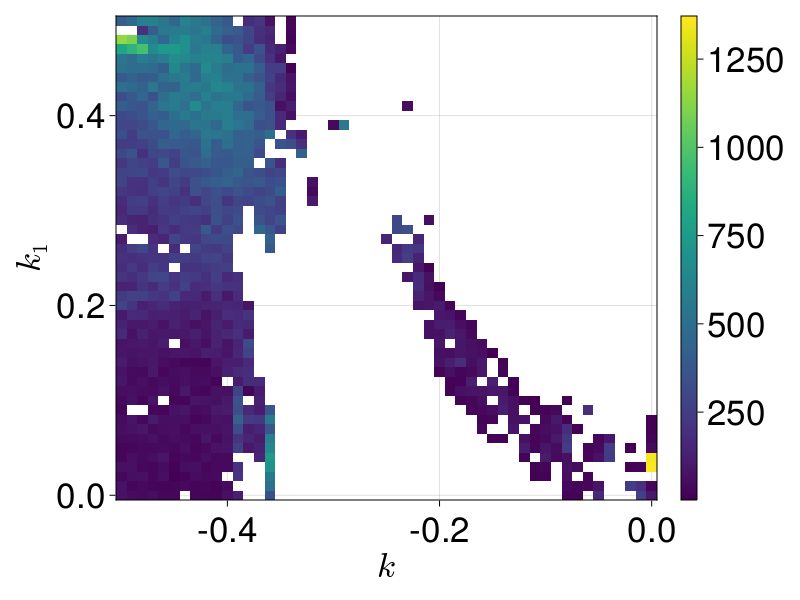

In [38]:
# k2 = -0.17
fig = Figure(fontsize = 35)
ax = Axis(fig[1, 1], xlabel = L"k", ylabel = L"k_1")
hm = heatmap!(ax, k1_space, k_space, transpose(EE_mapcopy))
Colorbar(fig[:, end+1], hm)
fig

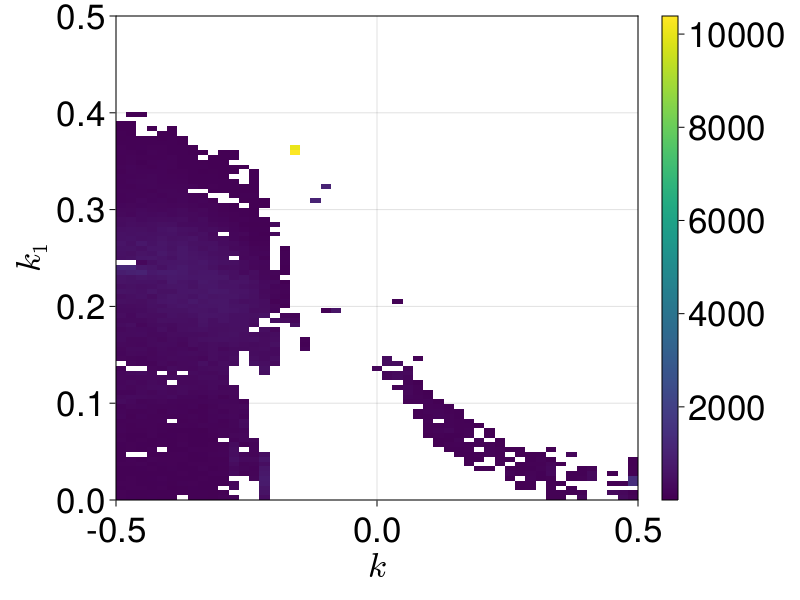

In [15]:
fig = Figure(fontsize = 35)
ax = Axis(fig[1, 1], xlabel = L"k", ylabel = L"k_1")
hm = heatmap!(ax, k1_space, k_space, transpose(EE_mapcopy))
Colorbar(fig[:, end+1], hm)
fig

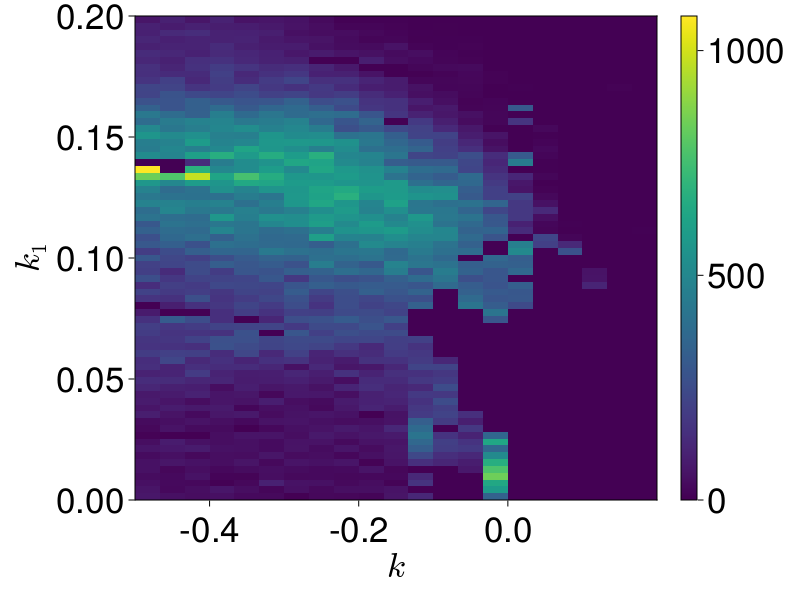

In [37]:
fig = Figure(fontsize = 35)
ax = Axis(fig[1, 1], xlabel = L"k", ylabel = L"k_1")
hm = heatmap!(ax, k1_space, k_space, transpose(EE_map))
Colorbar(fig[:, end+1], hm)
fig